In [1]:
from pandas_datareader import data
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import powerlaw

from statsmodels.distributions.empirical_distribution import ECDF

In [2]:
stock = '^GSPC'
start_date = '1900-01-01'
end_date = '2018-09-26'

panel_data = data.DataReader(stock, 'yahoo', start_date, end_date)

In [3]:
panel_data[panel_data['Adj Close'] == 1872.25]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-03-18,1873.76001,1858.920044,1858.920044,1872.25,2930190000,1872.25


In [4]:
panel_data.iloc[:16290].tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-09-23,1995.410034,1982.770020,1992.780029,1982.770020,3279350000,1982.770020
2014-09-24,1999.790039,1978.630005,1983.339966,1998.300049,3313850000,1998.300049
2014-09-25,1997.319946,1965.989990,1997.319946,1965.989990,3273050000,1965.989990
2014-09-26,1986.369995,1966.219971,1966.219971,1982.849976,2929440000,1982.849976
2014-09-29,1981.280029,1964.040039,1978.959961,1977.800049,3094440000,1977.800049


In [5]:
len(panel_data.loc[:'2014-03-18'])

16155

In [6]:
16290-16155

135

In [7]:
panel_data['Adj Close'] 

Date
1950-01-03      16.660000
1950-01-04      16.850000
1950-01-05      16.930000
1950-01-06      16.980000
1950-01-09      17.080000
1950-01-10      17.030001
1950-01-11      17.090000
1950-01-12      16.760000
1950-01-13      16.670000
1950-01-16      16.719999
1950-01-17      16.860001
1950-01-18      16.850000
1950-01-19      16.870001
1950-01-20      16.900000
1950-01-23      16.920000
1950-01-24      16.860001
1950-01-25      16.740000
1950-01-26      16.730000
1950-01-27      16.820000
1950-01-30      17.020000
1950-01-31      17.049999
1950-02-01      17.049999
1950-02-02      17.230000
1950-02-03      17.290001
1950-02-06      17.320000
1950-02-07      17.230000
1950-02-08      17.209999
1950-02-09      17.280001
1950-02-10      17.240000
1950-02-14      17.059999
                 ...     
2018-08-15    2818.370117
2018-08-16    2840.689941
2018-08-17    2850.129883
2018-08-20    2857.050049
2018-08-21    2862.959961
2018-08-22    2861.820068
2018-08-23    2856.979980
2018-08

In [8]:
log_returns = np.log(panel_data['Adj Close']).diff()

In [9]:
log_returns[log_returns == 0]

Date
1950-02-01    0.0
1950-02-15    0.0
1950-02-27    0.0
1950-03-24    0.0
1950-04-25    0.0
1950-05-09    0.0
1950-05-11    0.0
1950-05-25    0.0
1950-10-23    0.0
1950-12-08    0.0
1951-01-05    0.0
1951-03-06    0.0
1951-03-09    0.0
1951-04-20    0.0
1951-07-06    0.0
1951-09-04    0.0
1951-09-19    0.0
1951-12-20    0.0
1952-03-14    0.0
1952-03-24    0.0
1952-04-03    0.0
1952-06-12    0.0
1952-07-16    0.0
1952-08-14    0.0
1952-10-30    0.0
1952-12-15    0.0
1953-05-08    0.0
1953-06-19    0.0
1953-06-30    0.0
1953-07-24    0.0
             ... 
1969-09-23    0.0
1970-03-31    0.0
1970-06-02    0.0
1971-07-02    0.0
1971-11-12    0.0
1972-01-20    0.0
1974-03-04    0.0
1974-04-04    0.0
1975-06-27    0.0
1976-03-26    0.0
1976-04-29    0.0
1977-02-22    0.0
1977-12-27    0.0
1978-01-27    0.0
1979-05-11    0.0
1979-07-27    0.0
1979-08-29    0.0
1979-08-30    0.0
1979-10-03    0.0
1983-03-07    0.0
1983-08-11    0.0
1985-03-28    0.0
1985-10-08    0.0
1988-02-04    0.0
1988-

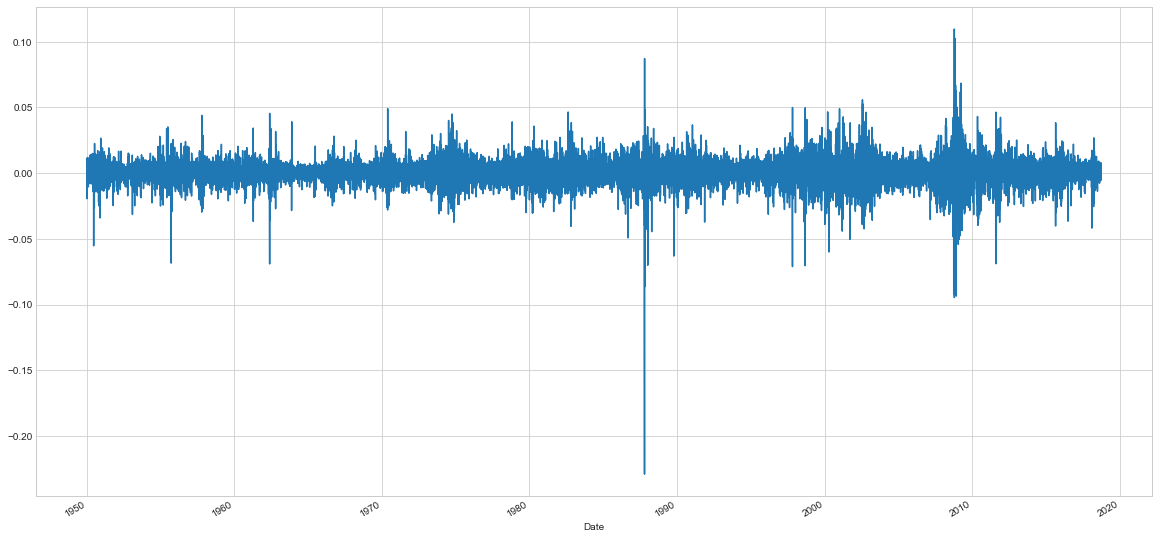

In [10]:
log_returns.plot(figsize = (20,10))

In [11]:
ecdf = ECDF(abs(log_returns))

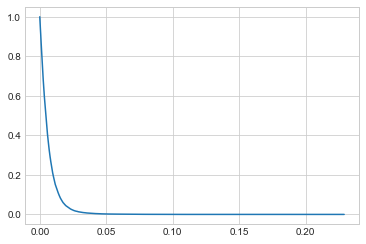

In [12]:
plt.plot(ecdf.x,1-ecdf.y)

/Users/mike/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


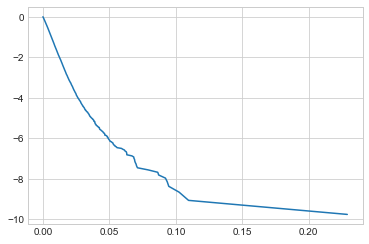

In [13]:
plt.plot(ecdf.x, np.log(1-ecdf.y))

In [14]:
equities = pd.read_csv('../data/us_equities.csv.gz', compression = 'gzip')

In [15]:
equities

,Unnamed: 0,^GSPC,GE,IBM,DIS,BA,CAT,AA,HPQ,DD,...,CTX,CTR,DYN,AIB,PCU,KIM,SFN,AMR,TCO,S
0,1,16.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,16.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,16.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,16.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,17.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,17.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,17.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,16.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,16.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
np.shape(equities)

(16291, 1054)

In [17]:
len(equities['^GSPC'])-len(equities['^GSPC'].dropna())

136

In [18]:
16291/365

44.632876712328766

In [19]:
136/16291

0.008348167699957032

In [20]:
16291-136


16155

In [21]:
16155/250

64.62

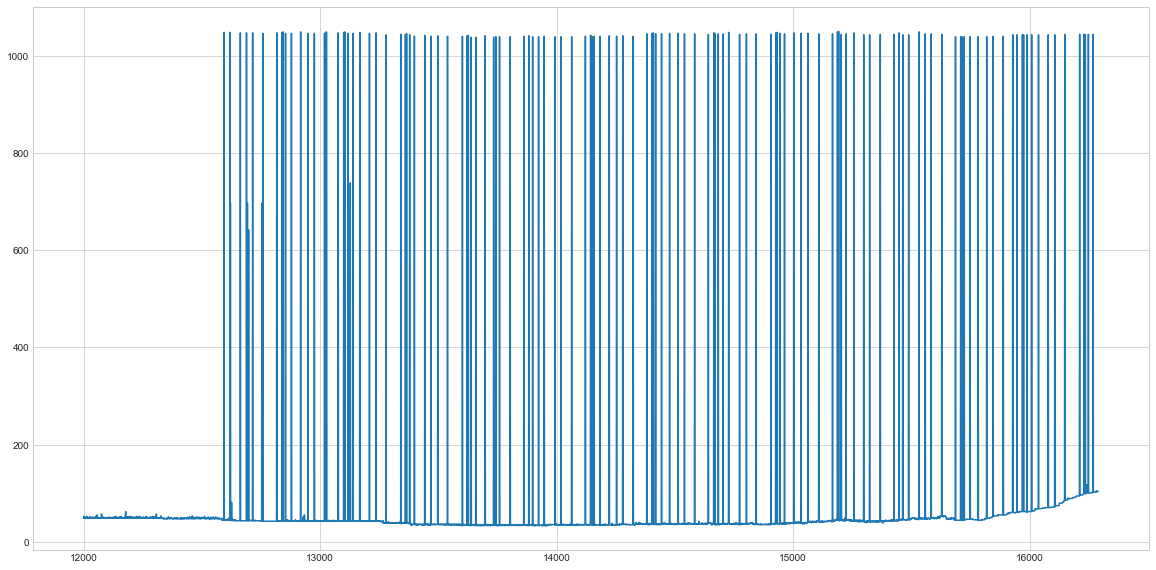

In [22]:
plt.figure(figsize = (20,10))
plt.plot(equities.isnull().sum(axis = 1)[12000:])


In [23]:
equities.isnull().sum(axis = 1).tail(30)

16261     101
16262     101
16263     101
16264     101
16265     101
16266     101
16267     101
16268     101
16269    1045
16270     102
16271     102
16272     102
16273     102
16274     102
16275     102
16276     102
16277     102
16278     102
16279     102
16280     102
16281     104
16282     103
16283     104
16284     103
16285     103
16286     103
16287     103
16288     104
16289     103
16290     103
dtype: int64

In [24]:
np.shape(equities)

(16291, 1054)

In [25]:
12500*4


50000

In [26]:
len(equities.columns)

1054

In [27]:
x = equities[equities.isnull().sum(axis = 1) < 1000]

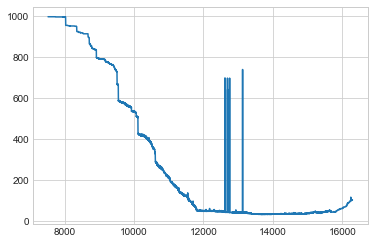

In [28]:
plt.plot(x.isnull().sum(axis = 1))

In [29]:
#panel_data[panel_data['Adj Close'] == equities['^GSPC']]

In [30]:
a = equities[equities['^GSPC'].isnull()].sum(axis = 0 )[equities[equities['^GSPC'].isnull()].sum(axis = 0 )>0].index

In [31]:
a

Index(['Unnamed: 0', 'BAX', 'TAP', 'WRB', 'AVY', 'ATO', 'AJG', 'AIT', 'B',
       'BMI', 'AZZ', 'CAS', 'ARL', 'CBT', 'BCE', 'GAS', 'AEM', 'BEN', 'ABX',
       'AM', 'BBY', 'PRX', 'BRC', 'AEG', 'SUN', 'SOV', 'SGR', 'LIZ', 'ABK',
       'ID', 'TKS', 'BMT', 'TBL', 'SBG', 'SEL', 'PPD', 'TPP', 'ARA', 'CXR',
       'WYE', 'PCU', 'AMR'],
      dtype='object')

In [32]:
results = powerlaw.Fit(log_returns[1:])
print(results.power_law.alpha)
print(results.power_law.xmin)

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
/Users/mike/miniconda3/lib/python3.5/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/mike/miniconda3/lib/python3.5/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


4.17812543579646
0.019094308774065816


In [33]:
 R, p = results.distribution_compare('power_law', 'lognormal_positive')

No valid fits found.
/Users/mike/miniconda3/lib/python3.5/site-packages/powerlaw.py:701: RuntimeWarning: overflow encountered in double_scalars
  )[1:]


In [54]:
import time

t0 = time.time()
powerlaw.Fit(log_returns[1:])
t1 = time.time()


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
/Users/mike/miniconda3/lib/python3.5/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/mike/miniconda3/lib/python3.5/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


In [55]:
t1-t0

11.94516897201538